Trying to get the raw data from wandb and plot nicer graphs than the web UI provides.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import wandb

from hw2 import PROJECT_ROOT

In [3]:
from wandb.apis.public.runs import Run

api = wandb.Api()
run: Run = api.run("papetoast-org1/CISC3027 hw3/q4eoe5vh")

In [4]:
type(run)

wandb.apis.public.runs.Run

In [5]:
full_history = run._full_history(samples=1000)
full_history = pd.DataFrame(full_history)
full_history

,_step,train/accuracy,_runtime,test/accuracy,test/loss,train/loss,epoch,train/lr,_timestamp
0,0,0.146894,17.186590,0.0475,4.994322,3.135835,0,0.0010,1.732624e+09
1,1,0.121387,30.394139,0.0485,4.644716,2.796566,1,0.0010,1.732624e+09
2,2,0.228094,42.660980,0.0698,5.461499,1.765492,2,0.0010,1.732624e+09
3,3,0.331865,54.378351,0.0684,6.211619,1.081970,3,0.0010,1.732624e+09
4,4,0.378383,67.092359,0.0889,7.155666,0.907114,4,0.0010,1.732624e+09
...,...,...,...,...,...,...,...,...,...
84,84,0.998532,1085.845311,0.1301,27.678031,0.000581,84,0.0001,1.732625e+09
85,85,0.993577,1097.176932,0.1304,26.426537,0.003838,85,0.0001,1.732625e+09
86,86,0.991834,1108.400685,0.1271,27.506597,0.002561,86,0.0001,1.732625e+09
87,87,0.994862,1120.670149,0.1269,27.359805,0.002173,87,0.0001,1.732625e+09


In [6]:
history = run.history()

In [7]:
history

,_step,train/accuracy,_runtime,test/accuracy,test/loss,train/loss,epoch,train/lr,_timestamp
0,0,0.146894,17.186590,0.0475,4.994322,3.135835,0,0.0010,1.732624e+09
1,1,0.121387,30.394139,0.0485,4.644716,2.796566,1,0.0010,1.732624e+09
2,2,0.228094,42.660980,0.0698,5.461499,1.765492,2,0.0010,1.732624e+09
3,3,0.331865,54.378351,0.0684,6.211619,1.081970,3,0.0010,1.732624e+09
4,4,0.378383,67.092359,0.0889,7.155666,0.907114,4,0.0010,1.732624e+09
...,...,...,...,...,...,...,...,...,...
84,84,0.998532,1085.845311,0.1301,27.678031,0.000581,84,0.0001,1.732625e+09
85,85,0.993577,1097.176932,0.1304,26.426537,0.003838,85,0.0001,1.732625e+09
86,86,0.991834,1108.400685,0.1271,27.506597,0.002561,86,0.0001,1.732625e+09
87,87,0.994862,1120.670149,0.1269,27.359805,0.002173,87,0.0001,1.732625e+09


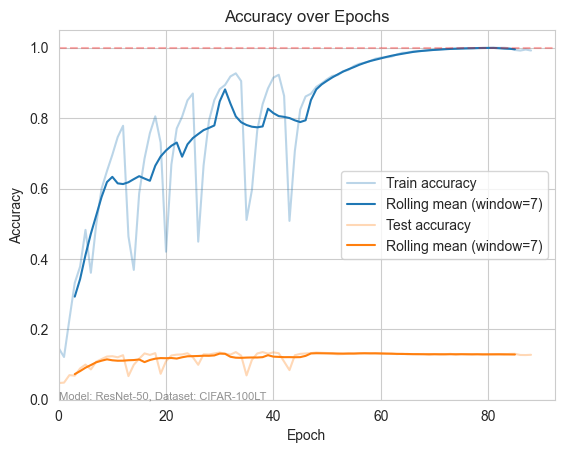

In [9]:
# plot accuracy over epochs
history["train/rolling_accuracy"] = history["train/accuracy"].rolling(window=7, center=True).mean()
history["test/rolling_accuracy"] = history["test/accuracy"].rolling(window=7, center=True).mean()
fig = plt.figure()
plt.plot(history["epoch"], history["train/accuracy"], alpha=0.3, color="#1f77b4")
plt.plot(history["epoch"], history["train/rolling_accuracy"], color="#1f77b4")
plt.plot(history["epoch"], history["test/accuracy"], alpha=0.3, color="#ff7f0e")
plt.plot(history["epoch"], history["test/rolling_accuracy"], color="#ff7f0e")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend(["Train accuracy", "Rolling mean (window=7)", "Test accuracy", "Rolling mean (window=7)"])
# A line at y=1 for reference
plt.axhline(y=1, color='r', linestyle='--', alpha=0.3)

# Mention the dataset and the model in the figure
plt.text(0, 0.002, "Model: ResNet-50, Dataset: CIFAR-100LT", fontsize=8, alpha=0.5)

plt.ylim(0, 1.05)
plt.xlim(0)
# plt.show()
plt.savefig(PROJECT_ROOT / "artifacts" / run.project / f"train_accuracy_over_epochs_{run.id}.svg")

In [18]:
runs: wandb.apis.public.runs.Runs = api.runs("papetoast-org1/CISC3027 hw2", {"group": "experiment-varying-optimizers"})
histories = runs.histories(format="pandas")

In [18]:
histories

,_runtime,_step,_timestamp,epoch,run_id,test/accuracy,test/loss,train/accuracy,train/loss
0,236.203724,4,1.732202e+09,4,kqcz0g2u,0.5926,1.149145,0.59212,1.149991
1,47.449920,0,1.732202e+09,0,kqcz0g2u,0.4741,1.443124,0.38866,1.665052
2,92.634501,1,1.732202e+09,1,kqcz0g2u,0.5394,1.298765,0.50336,1.373022
3,139.422632,2,1.732202e+09,2,kqcz0g2u,0.5542,1.239156,0.55048,1.257146
4,187.037658,3,1.732202e+09,3,kqcz0g2u,0.5724,1.216221,0.57340,1.192999
5,140.184503,2,1.732203e+09,2,m5g4f2zw,0.1000,2.302976,0.09754,2.303687
6,94.071308,1,1.732202e+09,1,m5g4f2zw,0.1000,2.303194,0.09854,2.303615
7,47.814873,0,1.732202e+09,0,m5g4f2zw,0.1000,2.303805,0.09982,2.964156
8,186.229490,3,1.732203e+09,3,m5g4f2zw,0.1000,2.304043,0.10042,2.303579
9,232.807376,4,1.732203e+09,4,m5g4f2zw,0.1000,2.303040,0.10062,2.303638


In [21]:
from tqdm import tqdm

configs = []
for run in tqdm(runs):
    run_config = run.config
    run_config_df = pd.DataFrame.from_dict(run_config, orient='index').T
    run_config_df["run_id"] = run.id
    run_config_df["run_name"] = run.name
    configs.append(run_config_df)
config_df = pd.concat(configs,axis=0)

100%|██████████| 4/4 [00:00<00:00, 1328.15it/s]


In [22]:
config_df

,device,epochs,optimizer,batch_size,model,run_id,run_name
0,cuda,5,SGD,64,CNN,yj2d8ckq,helpful-cloud-62
0,cuda,5,Adam,64,CNN,kqcz0g2u,easy-wildflower-63
0,cuda,5,AdamW,64,CNN,n878zjs4,pious-voice-64
0,cuda,5,RMSprop,64,CNN,m5g4f2zw,sunny-puddle-65


In [23]:
configs

[  device epochs optimizer batch_size model    run_id          run_name
 0   cuda      5       SGD         64   CNN  yj2d8ckq  helpful-cloud-62,
   device epochs optimizer batch_size model    run_id            run_name
 0   cuda      5      Adam         64   CNN  kqcz0g2u  easy-wildflower-63,
   epochs optimizer batch_size model device    run_id        run_name
 0      5     AdamW         64   CNN   cuda  n878zjs4  pious-voice-64,
   model device epochs optimizer batch_size    run_id         run_name
 0   CNN   cuda      5   RMSprop         64  m5g4f2zw  sunny-puddle-65]

In [24]:
histories = pd.merge(config_df, histories, left_on="run_id", right_on="run_id")
histories

,device,epochs,optimizer,batch_size,model,run_id,run_name,_runtime,_step,_timestamp,epoch,test/accuracy,test/loss,train/accuracy,train/loss
0,cuda,5,SGD,64,CNN,yj2d8ckq,helpful-cloud-62,182.632243,3,1.732202e+09,3,0.1587,2.292160,0.15732,2.294448
1,cuda,5,SGD,64,CNN,yj2d8ckq,helpful-cloud-62,135.698620,2,1.732202e+09,2,0.1436,2.295951,0.12392,2.297644
2,cuda,5,SGD,64,CNN,yj2d8ckq,helpful-cloud-62,92.165569,1,1.732202e+09,1,0.1133,2.298678,0.10628,2.299922
3,cuda,5,SGD,64,CNN,yj2d8ckq,helpful-cloud-62,231.945739,4,1.732202e+09,4,0.1497,2.286843,0.15280,2.289940
4,cuda,5,SGD,64,CNN,yj2d8ckq,helpful-cloud-62,48.408874,0,1.732202e+09,0,0.1022,2.300918,0.10182,2.301866
5,cuda,5,Adam,64,CNN,kqcz0g2u,easy-wildflower-63,236.203724,4,1.732202e+09,4,0.5926,1.149145,0.59212,1.149991
6,cuda,5,Adam,64,CNN,kqcz0g2u,easy-wildflower-63,47.449920,0,1.732202e+09,0,0.4741,1.443124,0.38866,1.665052
7,cuda,5,Adam,64,CNN,kqcz0g2u,easy-wildflower-63,92.634501,1,1.732202e+09,1,0.5394,1.298765,0.50336,1.373022
8,cuda,5,Adam,64,CNN,kqcz0g2u,easy-wildflower-63,139.422632,2,1.732202e+09,2,0.5542,1.239156,0.55048,1.257146
9,cuda,5,Adam,64,CNN,kqcz0g2u,easy-wildflower-63,187.037658,3,1.732202e+09,3,0.5724,1.216221,0.57340,1.192999


In [25]:
histories.set_index(["optimizer", "epoch"], inplace=True)

In [26]:
histories

device epochs batch_size model    run_id            run_name  \
optimizer epoch                                                                
SGD       3       cuda      5         64   CNN  yj2d8ckq    helpful-cloud-62   
          2       cuda      5         64   CNN  yj2d8ckq    helpful-cloud-62   
          1       cuda      5         64   CNN  yj2d8ckq    helpful-cloud-62   
          4       cuda      5         64   CNN  yj2d8ckq    helpful-cloud-62   
          0       cuda      5         64   CNN  yj2d8ckq    helpful-cloud-62   
Adam      4       cuda      5         64   CNN  kqcz0g2u  easy-wildflower-63   
          0       cuda      5         64   CNN  kqcz0g2u  easy-wildflower-63   
          1       cuda      5         64   CNN  kqcz0g2u  easy-wildflower-63   
          2       cuda      5         64   CNN  kqcz0g2u  easy-wildflower-63   
          3       cuda      5         64   CNN  kqcz0g2u  easy-wildflower-63   
AdamW     0       cuda      5         64   CNN  n878zjs4      pious-voice-64   
          1       cuda      5         64   CNN  n878zjs4      pious-voice-64   
          2       cuda      5         64   CNN  n878zjs4      pious-voice-64   
          3       cuda      5         64   CNN  n878zjs4      pious-voice-64   
          4       cuda      5         64   CNN  n878zjs4      pious-voice-64   
RMSprop   2       cuda      5         64   CNN  m5g4f2zw     sunny-puddle-65   
          1       cuda      5         64   CNN  m5g4f2zw     sunny-puddle-65   
          0       cuda      5         64   CNN  m5g4f2zw     sunny-puddle-65   
          3       cuda      5         64   CNN  m5g4f2zw     sunny-puddle-65   
          4       cuda      5         64   CNN  m5g4f2zw     sunny-puddle-65   

                   _runtime  _step    _timestamp  test/accuracy  test/loss  \
optimizer epoch                                                              
SGD       3      182.632243      3  1.732202e+09         0.1587   2.292160   
          2      135.698620      2  1.732202e+09         0.1436   2.295951   
          1       92.165569      1  1.732202e+09         0.1133   2.298678   
          4      231.945739      4  1.732202e+09         0.1497   2.286843   
          0       48.408874      0  1.732202e+09         0.1022   2.300918   
Adam      4      236.203724      4  1.732202e+09         0.5926   1.149145   
          0       47.449920      0  1.732202e+09         0.4741   1.443124   
          1       92.634501      1  1.732202e+09         0.5394   1.298765   
          2      139.422632      2  1.732202e+09         0.5542   1.239156   
          3      187.037658      3  1.732202e+09         0.5724   1.216221   
AdamW     0       52.382571      0  1.732202e+09         0.4838   1.423681   
          1       98.672832      1  1.732202e+09         0.5304   1.308976   
          2      144.349632      2  1.732202e+09         0.5594   1.251766   
          3      190.795926      3  1.732202e+09         0.5855   1.169487   
          4      236.727897      4  1.732202e+09         0.5827   1.183203   
RMSprop   2      140.184503      2  1.732203e+09         0.1000   2.302976   
          1       94.071308      1  1.732202e+09         0.1000   2.303194   
          0       47.814873      0  1.732202e+09         0.1000   2.303805   
          3      186.229490      3  1.732203e+09         0.1000   2.304043   
          4      232.807376      4  1.732203e+09         0.1000   2.303040   

                 train/accuracy  train/loss  
optimizer epoch                              
SGD       3             0.15732    2.294448  
          2             0.12392    2.297644  
          1             0.10628    2.299922  
          4             0.15280    2.289940  
          0             0.10182    2.301866  
Adam      4             0.59212    1.149991  
          0             0.38866    1.665052  
          1             0.50336    1.373022  
          2             0.55048    1.257146  
          3             0.57340 

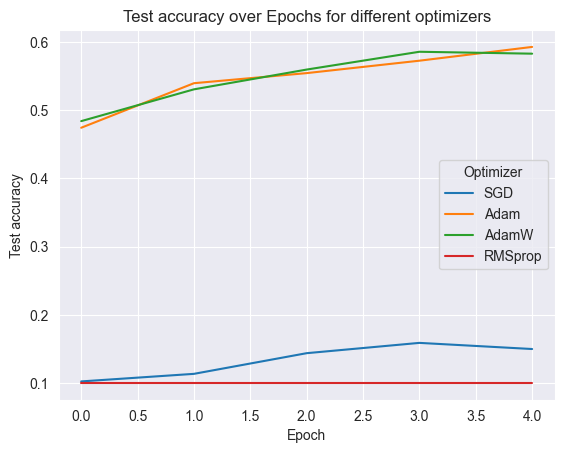

In [27]:
# plot test accuracy over epochs for different optimizers
fig = plt.figure()
sns.lineplot(data=histories, x="epoch", y="test/accuracy", hue="optimizer")
plt.xlabel("Epoch")
plt.ylabel("Test accuracy")
plt.title("Test accuracy over Epochs for different optimizers")
plt.legend(title="Optimizer")
plt.savefig(PROJECT_ROOT / "artifacts" / "test_accuracy_over_epochs_optimizers.svg")

In [6]:

from hw2.utils import get_histories_with_config

runs = api.runs("papetoast-org1/CISC3027 hw2", {"group": "experiment-varying-batch-size"})
histories = get_histories_with_config(runs)
histories

100%|██████████| 17/17 [00:00<00:00, 2426.85it/s]


,device,epochs,optimizer,batch_size,learning_rate,model,run_id,run_name,_runtime,_step,_timestamp,epoch,test/accuracy,test/loss,train/accuracy,train/loss
0,cuda,5,AdamW,65536,0.001,CNN,rd89ftdc,lucky-deluge-36,78.056442,0,1.732191e+09,0,0.1033,2.300802,0.10474,2.305019
1,cuda,5,AdamW,65536,0.001,CNN,rd89ftdc,lucky-deluge-36,124.022254,1,1.732191e+09,1,0.1319,2.296041,0.10106,2.300925
2,cuda,5,AdamW,65536,0.001,CNN,rd89ftdc,lucky-deluge-36,169.949040,2,1.732191e+09,2,0.1802,2.289245,0.13092,2.295893
3,cuda,5,AdamW,65536,0.001,CNN,rd89ftdc,lucky-deluge-36,255.098667,4,1.732191e+09,4,0.1465,2.270802,0.15456,2.280433
4,cuda,5,AdamW,65536,0.001,CNN,rd89ftdc,lucky-deluge-36,213.337285,3,1.732191e+09,3,0.1517,2.281015,0.18116,2.289008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,cuda,5,AdamW,1,0.001,CNN,vvsl1hqo,stellar-sky-52,806.127574,2,1.732197e+09,2,0.5037,1.419936,0.47452,1.471311
81,cuda,5,AdamW,1,0.001,CNN,vvsl1hqo,stellar-sky-52,531.515348,1,1.732197e+09,1,0.4351,1.580493,0.45644,1.521996
82,cuda,5,AdamW,1,0.001,CNN,vvsl1hqo,stellar-sky-52,270.317257,0,1.732197e+09,0,0.4323,1.555012,0.38470,1.682825
83,cuda,5,AdamW,1,0.001,CNN,vvsl1hqo,stellar-sky-52,1329.991985,4,1.732198e+09,4,0.4942,1.434249,0.50094,1.416739


In [7]:
histories_backup = histories.copy()

In [8]:
# Set batch size to 50000 for the run with batch size 65536
histories.loc[histories["batch_size"] == 65536, "batch_size"] = 50000

In [9]:
histories

,device,epochs,optimizer,batch_size,learning_rate,model,run_id,run_name,_runtime,_step,_timestamp,epoch,test/accuracy,test/loss,train/accuracy,train/loss
0,cuda,5,AdamW,50000,0.001,CNN,rd89ftdc,lucky-deluge-36,78.056442,0,1.732191e+09,0,0.1033,2.300802,0.10474,2.305019
1,cuda,5,AdamW,50000,0.001,CNN,rd89ftdc,lucky-deluge-36,124.022254,1,1.732191e+09,1,0.1319,2.296041,0.10106,2.300925
2,cuda,5,AdamW,50000,0.001,CNN,rd89ftdc,lucky-deluge-36,169.949040,2,1.732191e+09,2,0.1802,2.289245,0.13092,2.295893
3,cuda,5,AdamW,50000,0.001,CNN,rd89ftdc,lucky-deluge-36,255.098667,4,1.732191e+09,4,0.1465,2.270802,0.15456,2.280433
4,cuda,5,AdamW,50000,0.001,CNN,rd89ftdc,lucky-deluge-36,213.337285,3,1.732191e+09,3,0.1517,2.281015,0.18116,2.289008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,cuda,5,AdamW,1,0.001,CNN,vvsl1hqo,stellar-sky-52,806.127574,2,1.732197e+09,2,0.5037,1.419936,0.47452,1.471311
81,cuda,5,AdamW,1,0.001,CNN,vvsl1hqo,stellar-sky-52,531.515348,1,1.732197e+09,1,0.4351,1.580493,0.45644,1.521996
82,cuda,5,AdamW,1,0.001,CNN,vvsl1hqo,stellar-sky-52,270.317257,0,1.732197e+09,0,0.4323,1.555012,0.38470,1.682825
83,cuda,5,AdamW,1,0.001,CNN,vvsl1hqo,stellar-sky-52,1329.991985,4,1.732198e+09,4,0.4942,1.434249,0.50094,1.416739


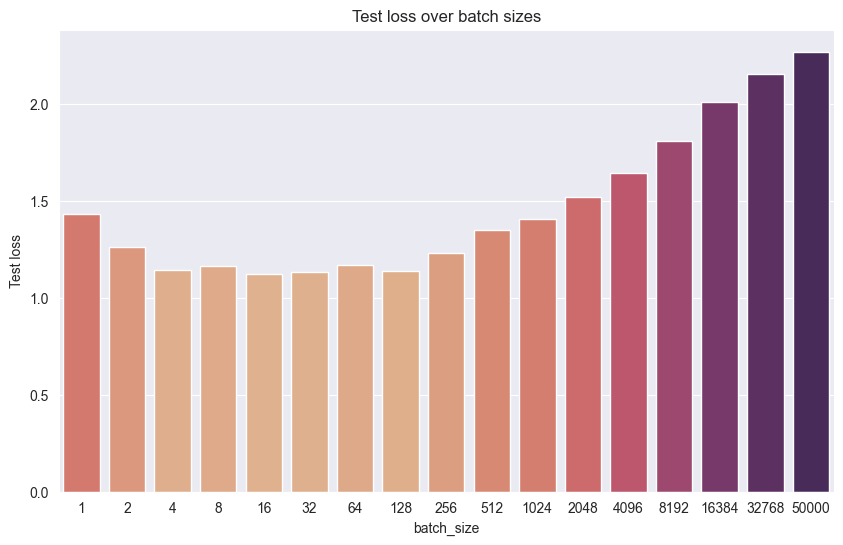

In [49]:
histories["log_batch_size"] = histories["batch_size"].apply(lambda x: int(x).bit_length())
fig, ax = plt.subplots(figsize=(10, 6))
cmap = sns.color_palette("flare", as_cmap=True)
sns.barplot(data=histories[histories["epoch"] == 4], x="batch_size", y="test/loss", hue="test/loss", palette=cmap, errorbar=None, ax=ax, legend=None)
plt.xlabel("batch_size")
plt.ylabel("Test loss")
plt.title("Test loss over batch sizes")
plt.savefig(PROJECT_ROOT / "artifacts" / "test_loss_over_batch_sizes.svg")

In [19]:
histories

,device,epochs,optimizer,batch_size,learning_rate,model,run_id,run_name,_runtime,_step,_timestamp,epoch,test/accuracy,test/loss,train/accuracy,train/loss,log_batch_size
0,cuda,5,AdamW,50000,0.001,CNN,rd89ftdc,lucky-deluge-36,78.056442,0,1.732191e+09,0,0.1033,2.300802,0.10474,2.305019,16
1,cuda,5,AdamW,50000,0.001,CNN,rd89ftdc,lucky-deluge-36,124.022254,1,1.732191e+09,1,0.1319,2.296041,0.10106,2.300925,16
2,cuda,5,AdamW,50000,0.001,CNN,rd89ftdc,lucky-deluge-36,169.949040,2,1.732191e+09,2,0.1802,2.289245,0.13092,2.295893,16
3,cuda,5,AdamW,50000,0.001,CNN,rd89ftdc,lucky-deluge-36,255.098667,4,1.732191e+09,4,0.1465,2.270802,0.15456,2.280433,16
4,cuda,5,AdamW,50000,0.001,CNN,rd89ftdc,lucky-deluge-36,213.337285,3,1.732191e+09,3,0.1517,2.281015,0.18116,2.289008,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,cuda,5,AdamW,1,0.001,CNN,vvsl1hqo,stellar-sky-52,806.127574,2,1.732197e+09,2,0.5037,1.419936,0.47452,1.471311,1
81,cuda,5,AdamW,1,0.001,CNN,vvsl1hqo,stellar-sky-52,531.515348,1,1.732197e+09,1,0.4351,1.580493,0.45644,1.521996,1
82,cuda,5,AdamW,1,0.001,CNN,vvsl1hqo,stellar-sky-52,270.317257,0,1.732197e+09,0,0.4323,1.555012,0.38470,1.682825,1
83,cuda,5,AdamW,1,0.001,CNN,vvsl1hqo,stellar-sky-52,1329.991985,4,1.732198e+09,4,0.4942,1.434249,0.50094,1.416739,1


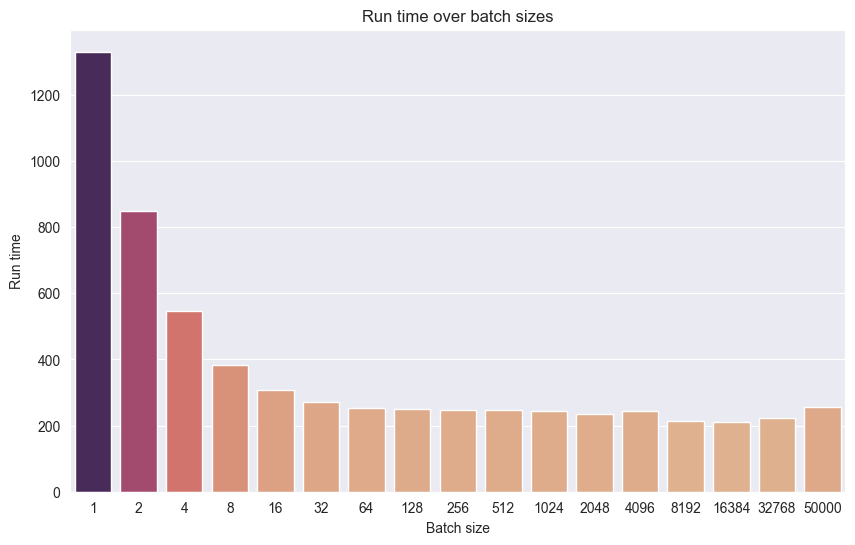

In [48]:
# Run time over batch sizes
fig, ax = plt.subplots(figsize=(10, 6))
cmap = sns.color_palette("flare", as_cmap=True)
sns.barplot(data=histories[histories["epoch"] == 4], x="batch_size", y="_runtime", hue="_runtime", palette=cmap, errorbar=None, ax=ax, legend=None)
plt.xlabel("Batch size")
plt.ylabel("Run time")
plt.title("Run time over batch sizes")
plt.savefig(PROJECT_ROOT / "artifacts" / "run_time_over_batch_sizes.svg")